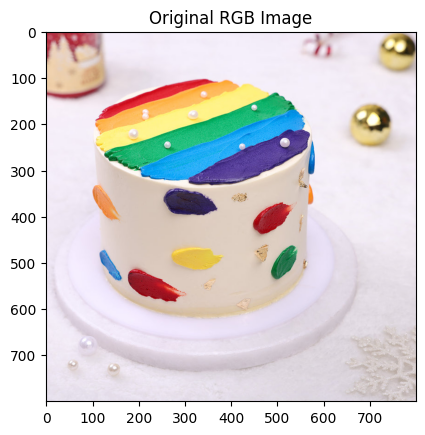

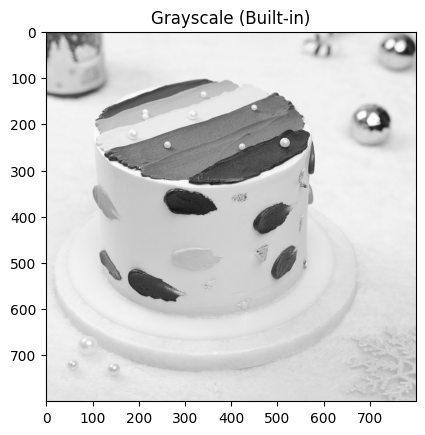

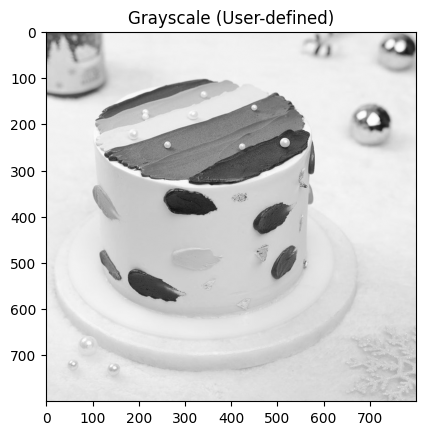

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1.Load the RGB image (assuming 'sample.jpg' is in the workspace)
image = cv2.imread('sample.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Original RGB Image')
plt.show()

# Built-in grayscale conversion
gray_builtin = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_builtin, cmap='gray')
plt.title('Grayscale (Built-in)')
plt.show()

# User-defined grayscale conversion
def rgb_to_gray(image):
    return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])

gray_user = rgb_to_gray(image_rgb)

plt.imshow(gray_user, cmap='gray')
plt.title('Grayscale (User-defined)')
plt.show()

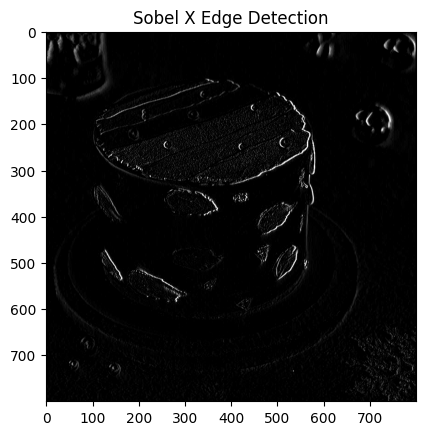

Interpretation: The Sobel X filter detects vertical edges by computing the gradient in the horizontal direction, highlighting areas of intensity change.


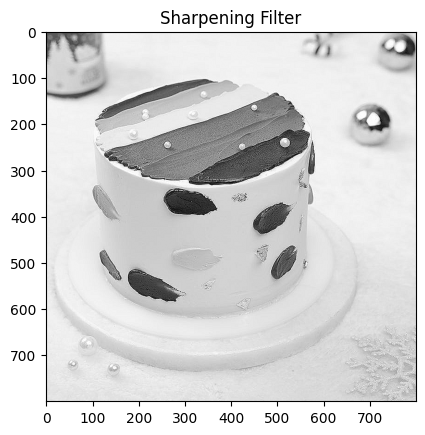

Interpretation: The sharpening filter enhances edges and fine details, making the image appear crisper by amplifying high-frequency components.


In [2]:
# 2.Define kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Convolution function
def convolve(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Apply Sobel X
sobel_result = convolve(gray_builtin, sobel_x)

plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel X Edge Detection')
plt.show()

print('Interpretation: The Sobel X filter detects vertical edges by computing the gradient in the horizontal direction, highlighting areas of intensity change.')

# Apply Sharpening
sharpen_result = convolve(gray_builtin, sharpen)

plt.imshow(sharpen_result, cmap='gray')
plt.title('Sharpening Filter')
plt.show()

print('Interpretation: The sharpening filter enhances edges and fine details, making the image appear crisper by amplifying high-frequency components.')

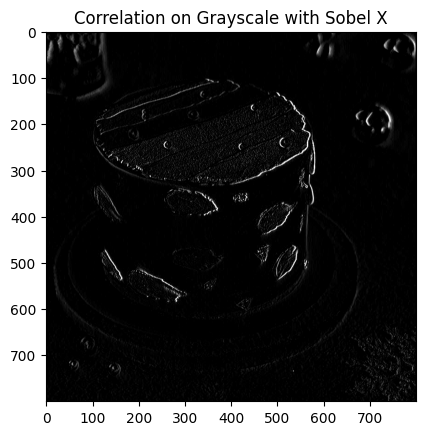

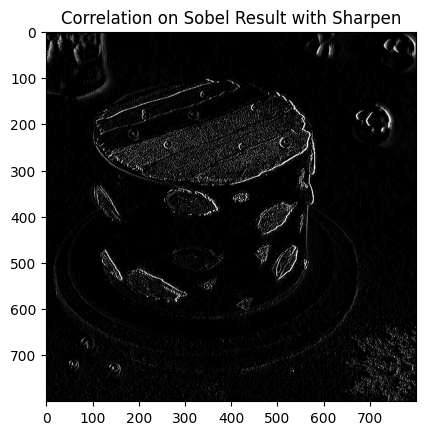

In [3]:
# 3.Correlation function (OpenCV's filter2D performs correlation)
def correlate(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Apply correlation on grayscale with Sobel X
corr_gray = correlate(gray_builtin, sobel_x)

plt.imshow(corr_gray, cmap='gray')
plt.title('Correlation on Grayscale with Sobel X')
plt.show()

# Apply correlation on Sobel result with Sharpen
corr_sobel = correlate(sobel_result, sharpen)

plt.imshow(corr_sobel, cmap='gray')
plt.title('Correlation on Sobel Result with Sharpen')
plt.show()

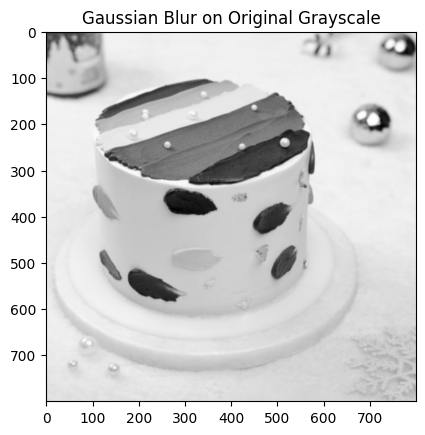

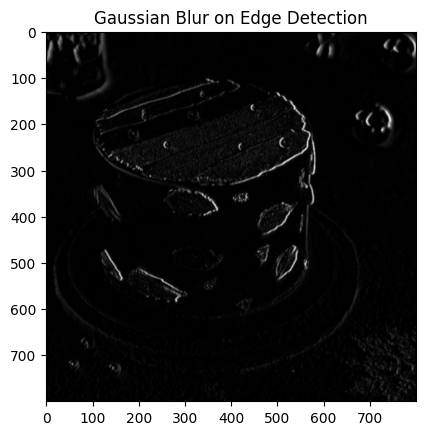

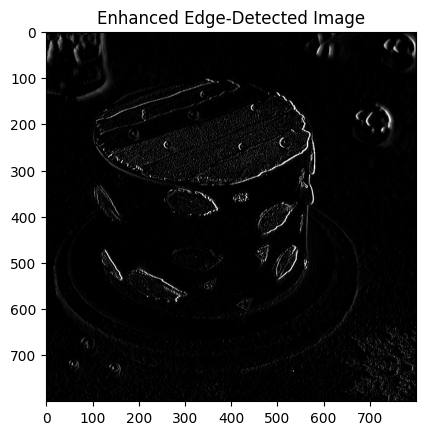

In [4]:
# 4.Gaussian blur on original grayscale
blur_original = cv2.GaussianBlur(gray_builtin, (5, 5), 0)

plt.imshow(blur_original, cmap='gray')
plt.title('Gaussian Blur on Original Grayscale')
plt.show()

# Gaussian blur on edge detection result
blur_edges = cv2.GaussianBlur(sobel_result, (5, 5), 0)

plt.imshow(blur_edges, cmap='gray')
plt.title('Gaussian Blur on Edge Detection')
plt.show()

# Enhanced edge-detected image
enhanced = cv2.addWeighted(sobel_result, 1.5, blur_edges, -0.5, 0)

plt.imshow(enhanced, cmap='gray')
plt.title('Enhanced Edge-Detected Image')
plt.show()

# 5. Comparison and Analysis

## Interpretation of Correlation Results
- Correlation with the Sobel kernel on the grayscale image highlights edges similar to convolution.
- Applying correlation on the convolution results (e.g., sharpening the edge-detected image) can further modify the image features, potentially enhancing or smoothing the detected edges.

## Effect of Combining Edge Detection with Gaussian Blur
- Applying Gaussian blur to the edge-detected image reduces noise and minor fluctuations, resulting in cleaner edges.
- Combining it with the original edge detection (via weighted addition) enhances the contrast and definition of edges, making them more prominent while suppressing background noise.